GiveMeSomeCredit---Kaggle

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from scipy import stats

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_data = pd.read_csv("~/data/kaggle/GiveMeSomeCredit/cs-training.csv", index_col=0)
test_data = pd.read_csv("~/data/kaggle/GiveMeSomeCredit/cs-test.csv", index_col=0)


There are 150k records. For MonthlyIncome and Number of Dependents, there are some missing data. We should fix this problem.

In [3]:
train_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


# Missing data
Since MonthlyIncome has a lot of missing data, if we directly delete the these rows, we may loss a lot of information. Thus, we try to fill them. For example, we can choose random forest.

In [4]:
df = train_data.iloc[:, [5, 0, 1, 2, 3, 4, 6, 7, 8, 9]]

In [5]:
df.head()

,MonthlyIncome,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
1,9120.0,1,0.766127,45,2,0.802982,13,0,6,0
2,2600.0,0,0.957151,40,0,0.121876,4,0,0,0
3,3042.0,0,0.658180,38,1,0.085113,2,1,0,0
4,3300.0,0,0.233810,30,0,0.036050,5,0,0,0
5,63588.0,0,0.907239,49,1,0.024926,7,0,1,0


In [6]:
known = df.loc[df.MonthlyIncome.notnull(), :]
unknown = df.loc[df.MonthlyIncome.isnull(), :]

In [7]:
X = known.iloc[:, 1:]
y = known.iloc[:, 0]

In [8]:
model = RandomForestRegressor(random_state=0, n_estimators=200,
                              max_depth=3, n_jobs=-1)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [9]:
pred = model.predict(unknown.iloc[:, 1:]).round(0)

In [10]:
train_data.loc[(train_data.MonthlyIncome.isnull()), 'MonthlyIncome'] = pred

For the NumberOfDependents, since it doesn't have many missing records, we just drop them.

In [11]:
train_data = train_data.dropna()
train_data.shape

(146076, 11)

# Abnormal data
Then, we should check and deal with the abnormal data points. From the describtion of the data, we can see that the minimun of age is 0, which is abnormal.

In [11]:
train_data = train_data.loc[train_data.age > 0, :]

In [12]:
train_data.shape

(146075, 11)

From the boxplots below, we can find that for NumberOfTime30-59DaysPastDueNotWorse、NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse, there are sveral abnormal data points.

In [13]:
# plt.figure(figsize=(16, 30))
# for i in range(1, 12):
#     plt.subplot(6, 2, i)
#     plt.boxplot(x=train_data.iloc[:, i-1], labels=[train_data.columns[i-1]])

In [14]:
train_data = train_data.loc[train_data.NumberOfTimes90DaysLate < 90, :]

In [15]:
# plt.figure(figsize=(16, 30))
# for i in range(1, 12):
#     plt.subplot(6, 2, i)
#     plt.boxplot(x=train_data.iloc[:, i-1], labels=[train_data.columns[i-1]])

And also, we should reverse the SeriousDlqin2yrs.

In [16]:
train_data['SeriousDlqin2yrs'] = 1- train_data['SeriousDlqin2yrs']

In [17]:
y = train_data.iloc[:, 0]
X = train_data.iloc[:, 1:]

In [18]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42)

(array([8.6714e+04, 0.0000e+00, 2.6293e+04, 0.0000e+00, 1.9501e+04,
        0.0000e+00, 9.4790e+03, 0.0000e+00, 2.8600e+03, 0.0000e+00,
        7.4500e+02, 0.0000e+00, 1.5800e+02, 0.0000e+00, 5.1000e+01,
        0.0000e+00, 2.4000e+01, 0.0000e+00, 5.0000e+00, 0.0000e+00,
        5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ]),
 <a list of 40 Patch objects>)

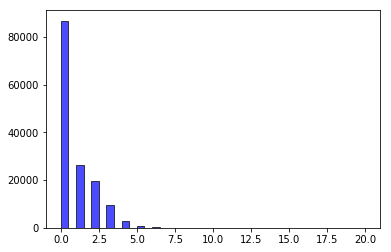

In [19]:
plt.hist(x=X.iloc[:, 9], bins=40, 
         facecolor="blue", edgecolor="black", alpha=0.7)

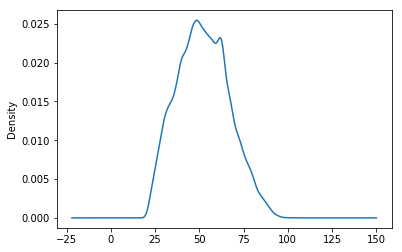

In [20]:
train_data.loc[:, 'age'].plot('kde')

In [21]:
def mono_bin1(Y, X, n = 20):
    r = 0
    good = Y.sum()
    bad = Y.count() - good
    while np.abs(r) < 1:
        d1 = pd.DataFrame({'X':X, 'Y':Y, 'Bucket':pd.qcut(X, n, duplicates='drop')})
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
    d3 = pd.DataFrame(d2.X.min(), columns=['min'])
    d3['min'] = d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate']/(1-d3['rate']))/(good/bad))
    d4 = (d3.sort_values(by='min')).reset_index(drop=True)
    return d4, n

# IV
We can see that most of variables are uncorrelated.

In [22]:
# corr = train_data.corr()
# xticks = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
# yticks = list(corr.index)

# fig = plt.figure(figsize=(20, 20))
# ax1 = fig.add_subplot(1, 1, 1)
# sns.heatmap(corr, annot=True, cmap='rainbow', ax=ax1,
#             annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'})
# ax1.set_xticklabels(xticks, rotation=0, fontsize=10)
# ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
# plt.show()

In [23]:
def mono_bin2(Y, X, n = 20):
    r = 0
    good = Y.sum()
    bad = Y.count() - good
    while np.abs(r) < 1:
        d1 = pd.DataFrame({'X':X, 'Y':Y, 
                           'Bucket':pd.qcut(X, n, duplicates='drop')})
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
    d3 = pd.DataFrame(d2.X.min(), columns=['min'])
    d3['min'] = d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate']/(1-d3['rate']))/(good/bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv=((d3['goodattribute']-d3['badattribute'])*d3['woe']).sum()
    d4 = (d3.sort_values(by='min')).reset_index(drop=True)
    cut = []
    cut.append(float('-inf'))
    for i in range(1, n+1):
        qua = X.quantile(i/(n+1))
        cut.append(round(qua, 4))
    cut.append(float('inf'))
    woe = list(d4['woe'].round(3))
    return iv, cut, woe

In [24]:
def self_bin(Y, X, cut):
    good = Y.sum()
    bad = Y.count() - good
    d1 = pd.DataFrame({'X': X, 'Y': Y, 'Bucket':pd.cut(X, cut)})
    d2 = d1.groupby('Bucket', as_index=True)
    d3 = pd.DataFrame(d2.X.min(), columns=['min'])
    d3['min'] = d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate']/(1-d3['rate']))/(good/bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv=((d3['goodattribute']-d3['badattribute'])*d3['woe']).sum()
    d4 = (d3.sort_values(by='min')).reset_index(drop=True)
    woe = list(d4['woe'].round(3))
    return iv, woe
    

In [25]:
ninf = np.float('-inf')
pinf = np.float('inf')
cutx3 = [ninf, 0, 1, 3, 5, pinf]
cutx6 = [ninf, 1, 2, 3, 5, pinf]
cutx7 = [ninf, 0, 1, 3, 5, pinf]
cutx8 = [ninf, 0,1,2, 3, pinf]
cutx9 = [ninf, 0, 1, 3, pinf]
cutx10 = [ninf, 0, 1, 2, 3, 5, pinf]

In [26]:
ivx1, cutx1, woex1 = mono_bin2(y,X.RevolvingUtilizationOfUnsecuredLines)
ivx2, cutx2, woex2 = mono_bin2(y, X.age)
ivx4, cutx4, woex4 = mono_bin2(y, X.DebtRatio)
ivx5, cutx5, woex5 = mono_bin2(y, X.MonthlyIncome)


In [27]:
ivx3, woex3 = self_bin(y, X['NumberOfTime30-59DaysPastDueNotWorse'], cutx3)
ivx6, woex6 = self_bin(y, X['NumberOfOpenCreditLinesAndLoans'], cutx6)
ivx7, woex7 = self_bin(y, X['NumberOfTimes90DaysLate'], cutx7)
ivx8, woex8 = self_bin(y, X['NumberRealEstateLoansOrLines'], cutx8)
ivx9, woex9 = self_bin(y, X['NumberOfTime60-89DaysPastDueNotWorse'], cutx9)
ivx10,woex10 = self_bin(y, X['NumberOfDependents'], cutx10)

In [28]:
ivlist = [ivx1, ivx2, ivx3, ivx4, ivx5, ivx6, ivx7, ivx8, ivx9, ivx10]


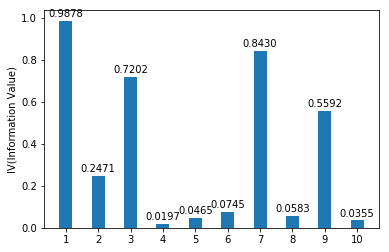

In [30]:
fig1 = plt.figure(1)
x = np.arange(10)+1
plt.bar(x, ivlist, width=0.4)
plt.xticks(x)
plt.ylabel('IV(Information Value)')
for a, b in zip(x, ivlist):
        plt.text(a, b + 0.01, '%.4f' % b,
                 ha='center', va='bottom', fontsize=10)
plt.show()

# Keep the 1, 2, 3, 7, 9 variables.

In [31]:
def replace_woe(series, cut, woe):
    list = []
    i = 0
    while i < len(series):
        value = series.iloc[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value >= cut[j]:
                j -= 1
            else:
                j -= 1
                m -= 1
        list.append(woe[m])
        i += 1
    return list

In [32]:
X['RevolvingUtilizationOfUnsecuredLines'] = replace_woe(X['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1)
X['age'] = replace_woe(X['age'], cutx2, woex2)
X['NumberOfTime30-59DaysPastDueNotWorse'] = replace_woe(X['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3)
X['DebtRatio'] = replace_woe(X['DebtRatio'], cutx4, woex4)
X['MonthlyIncome'] = replace_woe(X['MonthlyIncome'], cutx5, woex5)
X['NumberOfOpenCreditLinesAndLoans'] = replace_woe(X['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6)
X['NumberOfTimes90DaysLate'] = replace_woe(X['NumberOfTimes90DaysLate'], cutx7, woex7)
X['NumberRealEstateLoansOrLines'] = replace_woe(X['NumberRealEstateLoansOrLines'], cutx8, woex8)
X['NumberOfTime60-89DaysPastDueNotWorse'] = replace_woe(X['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9)
X['NumberOfDependents'] = replace_woe(X['NumberOfDependents'], cutx10, woex10)

In [34]:
woedata = pd.concat([X, y], axis=1)

In [35]:
woedata.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
1,-1.101,-0.206,-1.738,-0.184,0.336,0.124,-1.966,-0.598,-1.833,-0.300,0
2,-1.101,-0.335,-0.906,0.136,-0.170,0.025,-1.966,0.242,-1.833,-0.205,1
3,-1.101,-0.335,-1.738,0.136,-0.170,-0.166,-2.728,0.242,-1.833,-0.100,1
4,0.291,-0.501,-0.906,0.136,-0.170,0.124,-1.966,0.242,-1.833,-0.100,1
5,-1.101,-0.166,-1.738,0.136,0.336,0.124,-1.966,0.184,-1.833,-0.100,1


In [38]:
woedata.to_csv('WoeData.csv', index=False)

In [37]:
test_data['RevolvingUtilizationOfUnsecuredLines'] = replace_woe(test_data['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1)
test_data['age'] = replace_woe(test_data['age'], cutx2, woex2)
test_data['NumberOfTime30-59DaysPastDueNotWorse'] = replace_woe(test_data['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3)
test_data['DebtRatio'] = replace_woe(test_data['DebtRatio'], cutx4, woex4)
test_data['MonthlyIncome'] = replace_woe(test_data['MonthlyIncome'], cutx5, woex5)
test_data['NumberOfOpenCreditLinesAndLoans'] = replace_woe(test_data['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6)
test_data['NumberOfTimes90DaysLate'] = replace_woe(test_data['NumberOfTimes90DaysLate'], cutx7, woex7)
test_data['NumberRealEstateLoansOrLines'] = replace_woe(test_data['NumberRealEstateLoansOrLines'], cutx8, woex8)
test_data['NumberOfTime60-89DaysPastDueNotWorse'] = replace_woe(test_data['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9)
test_data['NumberOfDependents'] = replace_woe(test_data['NumberOfDependents'], cutx10, woex10)
test_data.to_csv('TestWoeData.csv', index=False)